# Week 6: Runga-Kutta and the Finite Difference Method

Name: Manav Bilakhia

Date: 11th October 2022

## Place Library Imports Here

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

## Basic Midpoint RK and RK4

### Midpoint RK

<font color = blue>
Construct a function that implements the midpoint RK method to solve the first order differential equation

$$
\frac{dx}{dt} = F(x, t)
$$

It should take as inputs the function $F$ (assumed to be of two variables), the initial value $x_0$, the step size $\Delta t$, and the total number of steps $N$.  It should output two lists: a list of times $\{t_n\}$ and a list of positions $\{x_n\}$, each with $M+1$ elements (starting from $0$ and $x_0$ respectively.)

In [2]:
def Rk2(F, x0, delta_t, N):
    t_n = np.array([0.0]) #part of the initial condition
    x_n = np.array([x0]) #part of the initial condition
    for i in range(1, N+1): # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        t_n = np.append(t_n, t) #storing t values in an array
        x = x_n[i-1]+k2 #next term of x using weighted average
        x_n = np.append(x_n,np.array([x]),axis = 0) #storing x values in an array and making sure the shape is consistent
    return x_n, t_n #returning the arrays

The above function employees the RK2 method of solving ordinary differential equations 

### RK4

<font color = blue>
Now construct a function to solve the same type of problem, with the same inputs and outputs, but using the Runga-Kutta-4 algorithm.

In [3]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0]) #part of the initial condition
    x_n = np.array([x0]) #part of the initial condition
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n = np.append(t_n, t) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n = np.append(x_n,np.array([x]),axis = 0) #storing x values in an array and making sure the shape is consistent
    return x_n, t_n #returning the arrays

The above function employees the RK4 method of solving ordinary differential equations 

### Differential Equations

<font color = blue>
This isn't a computational problem, but prepatory work to establish exact solutions to a set of three differential equations (to compare with numerical work).  What should appear in the notebook is the worked out solution (that is, do it by hand and show your work here.)

#### Part a)

<font color = blue>
$$
\frac{dx}{dt} = t^{10} - 5t^2, \hspace{.75in} x(0) = 1
$$

$$
\frac{dx}{dt} = t^{10} - 5t^2
$$
Using separation of variables we get, 
$$
dx =  t^{10} - 5t^2 dt
$$
Taking integral on both sides we get, 
$$ x = \frac{t^{11}}{11} - \frac{5t^3}{3} +c$$
We know that $x(0) = 1$ therefore we our final equation is:
$$ x = \frac{t^{11}}{11} - \frac{5t^3}{3} +1$$

#### Part b)

<font color = blue>
$$
\frac{dx}{dt} = -tx, \hspace{.75in} x(0) = 1
$$

$$
\frac{dx}{dt} = -tx
$$
Using separation of variables we get, 
$$
\frac{1}{x}dx =  -t dt
$$
Taking integral on both sides we get, 
$$ ln|x| = \frac{-t^2}{2}+c$$

$$x = e^{ \frac{-t^2}{2}+c}$$
We know that $x(0) = 1$ therefore we our final equation is:
$$x = e^{ \frac{-t^2}{2}}$$

#### Part c)

<font color = blue>
$$
\frac{d^2x}{dt^2} = -29x - 4\frac{dx}{dt}, \hspace{.75in} x(0) = 1, \hspace{.75in} \dot{x}(0) = 0
$$

Since this is a second order differential equation, we must go back to our try and guess method. 

Lets assume that that the solution to this differential equation is $x(t) = Ae^{wt}$

Therefore its first derivative and second derivatives respectively are

$$\dot{x}(t) = Awe^{wt}$$ and $$\ddot{x}(t) = Aw^2e^{wt}$$

Substituting this back in the equation we get, 

$$Aw^2e^{wt} = -29  Ae^{wt} - 4 Awe^{wt}$$

On further simplifying this, we get:
$$w^2 = -29 -4w$$

Since now this is a normal quadratic equation, we can solve this using our quadratic formula $\frac{-b \pm \sqrt{b^2 -4ac}}{2a}$

On solving this we get the following roots:

$$w = -2 \pm 5i$$

Substituting the value of w back in our equation of x we get

$$x = Ae^{-(2+5i)t}+ Be^{-(2+5i)t}$$

This equation can be further simplified by applying eulers identity as

$$x = e^{-2t}[(A+B)cos(5t) +i(A-B)sin(5t)]$$

Applying our first initial condition $x(0) = 1$ and we get,

$$1 = (A+B)$$

To apply the second initial condition, we must first take the derivative of our equation for x.

$$\dot{x} = -2e^{-2t}[(A+B)cos(5t) +i(A-B)sin(5t)] +e^{-2t}[-5(A+B)sin(5t) + i5(A-B)cos(5t)]$$

Applying our second initial condition $\dot{x}(0) = 0$ and that $A+B = 1$ we get:

$$A-B = i\frac{2}{5}$$

We can now substitute these values of A+B and A-B in our equation for x to get the final solution to our differential equation:

$$x(t) = e^{-2t} [cos(5t) -\frac{2}{5} sin(5t)]$$

### Testing the RK Functions

<font color = blue>
Use both the midpoint and RK4 algorithms to solve each of the differential equations above, in the region $x \in [0, 1]$, with $\Delta x = 0.001$.  In each case, calulate (and plot) the residuals with respect to the exact result.  Identify features of these graphs.  For added insight, look at these graphs with a variety of "plot range" choices.

#### Part a)

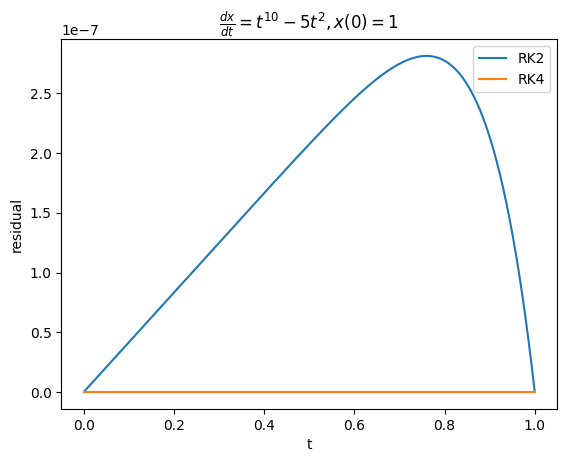

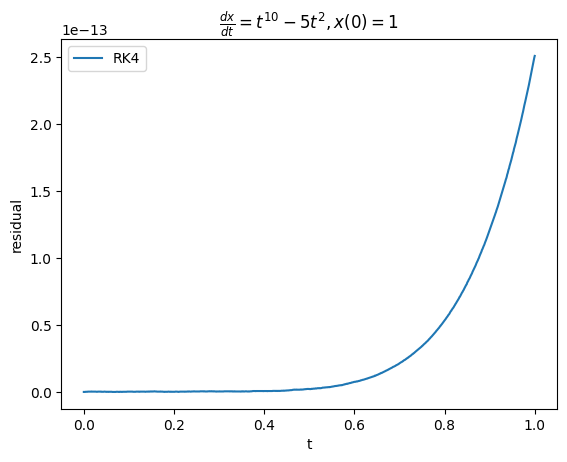

In [4]:
def f(x,t):
    return t**(10) - 5*(t**2) #mathematical function
x_n2, t_n2 = Rk2(f, 1, 0.001, 1000) #using RK2 method
x_n4, t_n4 = Rk4(f, 1, 0.001, 1000) #using RK4 method


def test(t):
    return ((t**11)/11 -(5*t**3)/3 +1) # analytical answer to the mathematical function
plt.plot(t_n2, x_n2-test(t_n2), label = "RK2") #calculating and plotting the difference between analytical soln and RK2 soln
plt.plot(t_n4, x_n4-test(t_n4), label = "RK4")  #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{dx}{dt} = t^{10} - 5t^2, x(0) = 1 $") #title
plt.legend()
plt.show()
plt.plot(t_n4, x_n4-test(t_n4), label = "RK4")  #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{dx}{dt} = t^{10} - 5t^2, x(0) = 1 $") #title
plt.legend()
plt.show()

From graph 1, we see that RK4 is a much better method than RK2. From graph 1 it seems that RK4 is a perfect numerical method as the residual is 0. On plotting it on another axes, We see that it is not 0 but to the order $10^{-13}$. RK4 is just a much more reliable method than RK2

#### Part b)

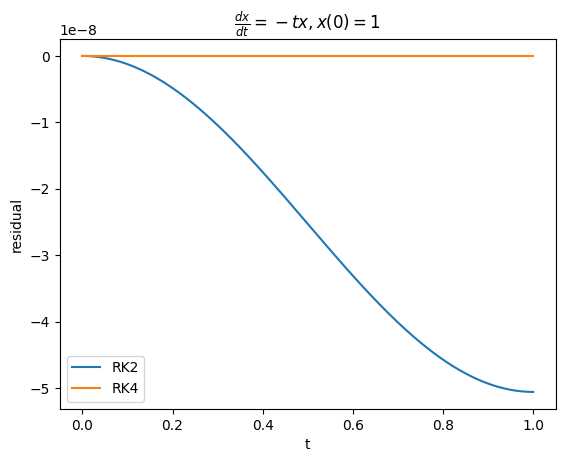

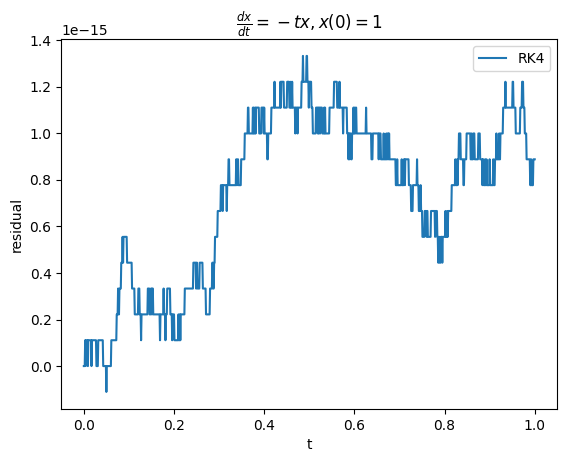

In [5]:
def f2(x,t):
    return -t*x #mathematical function

x_n2, t_n2 = Rk2(f2, 1, 0.001, 1000) #using RK2 method
x_n4, t_n4 = Rk4(f2, 1, 0.001, 1000) #using RK4 method

def test2(t): 
    return np.e**((-t**2)/2) # analytical answer to the mathematical function

plt.plot(t_n2, x_n2-test2(t_n2), label = "RK2") #calculating and plotting the difference between analytical soln and RK2 soln
plt.plot(t_n4, x_n4-test2(t_n4), label = "RK4" )  #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{dx}{dt} = -tx, x(0) = 1 $") #title
plt.legend()
plt.show()
plt.plot(t_n4, x_n4-test2(t_n4), label = "RK4")  #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{dx}{dt} = -tx, x(0) = 1 $") #title
plt.legend()
plt.show()

This is again consistent with the fact that RK4 is much more reliable than RK2. In the second graph, We do not see a continuous curve. This is because we know that the computer as well works discretely such that we see the jumps between two points. The fact that w see this weird graph means that we our RK4 method is extremely accurate. 

#### Part c)

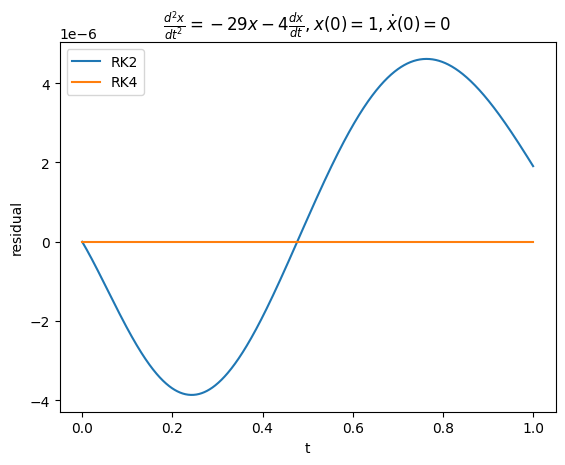

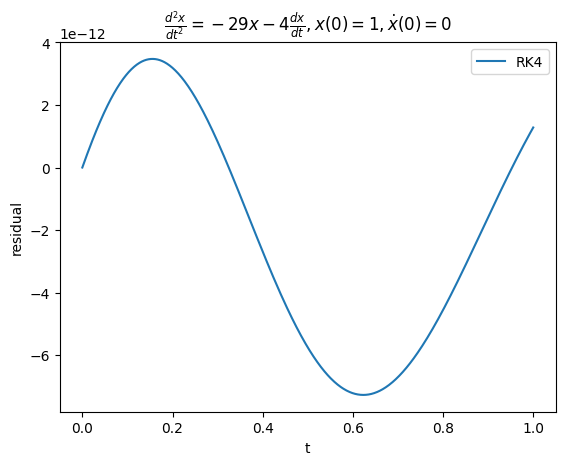

In [6]:
def f3(x_n,t):
    return np.array([x_n[1],-29*x_n[0]-4*x_n[1]]) #mathematical function
def test3(t):
    return np.exp(-2*t)*(np.cos(5*t)+2/5*np.sin(5*t)) # analytical answer to the mathematical function
x_n2, t_n2 = Rk2(f3, [1,0], 0.001, 1000) #using RK2 method
x_n4, t_n4 = Rk4(f3, [1,0], 0.001, 1000) #using RK4 method

x_vals2 = np.array([x_n2[i][0]for i in range (len (x_n2))])# getting position vals from the meshed list
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n2, x_vals2 - test3(t_n2), label = "RK2") #calculating and plotting the difference between analytical soln and RK2 soln
plt.plot(t_n4, x_vals4 - test3(t_n4), label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{d^2x}{dt^2} = -29x - 4\\frac{dx}{dt}, x(0) = 1, \\dot{x}(0) = 0 $") #title
plt.legend()
plt.show()

plt.plot(t_n4, x_vals4 - test3(t_n4), label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("t") #x axis
plt.ylabel("residual") # yaxis
plt.title ("$\\frac{d^2x}{dt^2} = -29x - 4\\frac{dx}{dt}, x(0) = 1, \\dot{x}(0) = 0 $") #title
plt.legend()
plt.show()

This is again consistent with our analysis of RK4 being more accurate than RK2.

## The Lorentz Force Law

<font color = blue>
We are interested in analyzing the motions of particles near a line that carries both charge and current.  We know that in dimensionless form and in Cartesian coordinates, Newton's second law and the Lorentz force law gives us

$$
\ddot{x} = \frac{x(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{y} = \frac{y(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{z} = \frac{\kappa(x\dot{x} + y\dot{y})}{x^2 + y^2}
$$

where $\kappa$ is a parameter that controls the relative strength of the magnetic force as compared to the electric force.

### Trajectory Function

<font color = blue>
First, create a function that takes as its inputs a set of initial conditions (an array of six numbers $[x_0, y_0, z_0, v_{x0}, v_{y0}, v_{z0}]$), the values of $\Delta t$ and $N$, and the parameter $\kappa$.  It should use the RK4 code your wrote earlier and output simply the positions of the particle, as three arrays $[x_n]$, $[y_n]$, and $[z_n]$.

In [7]:
def trajectory(init_cond, delta_t, N,kappa): #Function that returns the trajectory of the particle. 
    def G(current_cond, t):  #mathematical function. Current cond is in the form of [𝑥0,𝑦0,𝑧0,𝑣𝑥0,𝑣𝑦0,𝑣𝑧0]
        x = current_cond[0] #unpacking current_cond
        y = current_cond[1] #unpacking current_cond
        z = current_cond[2] #unpacking current_cond
        vx = current_cond[3] #unpacking current_cond
        vy = current_cond[4] #unpacking current_cond
        vz = current_cond[5] #unpacking current_cond
        x_part = (x*(1-kappa*vz))/(x**2 +y**2) #2nd derivative of x
        y_part = (y*(1-kappa*vz))/(x**2 +y**2) #2nd derivative of y
        z_part = kappa*(x*vx +y*vy)/(x**2 +y**2) #2nd derivative of z
        to_return = np.array([vx, vy, vz, x_part, y_part, z_part]) #array to return
        return to_return
    x_n,t_n = Rk4(G,init_cond, delta_t, N) #Using RK4 on the mathematical function
    x_vals = np.array([x_n[i][0]for i in range (len (x_n))]) # getting x vals from the meshed list
    y_vals = np.array([x_n[i][1]for i in range (len (x_n))]) # getting x vals from the meshed list
    z_vals = np.array([x_n[i][2]for i in range (len (x_n))]) # getting x vals from the meshed list
    return x_vals, y_vals, z_vals #returning them

Our mathematical function is a second order differential equation here which cannot be a direct input to the RK4 method as it only takes in first order differential equations we take in a list of position and velocity and output a velocity acceleration list. We also have to reformat the output as it is not in a suitable format using list comprehensions.  

### * Particle Trajectories: $\kappa = 0$

<font color = blue>
Now, use this module to create 20 different trajectories, each with $\kappa = 0$, with initial conditions where each element in the list of six initial values is a random real number in the range $[-1, 1]$.  Set $\Delta t = .001$ and $N = 10000$. Display these trajectories together on a 3-dimensional graph.  (To do this, you will need to make use of the library mpl_toolkits.mplot3d.)

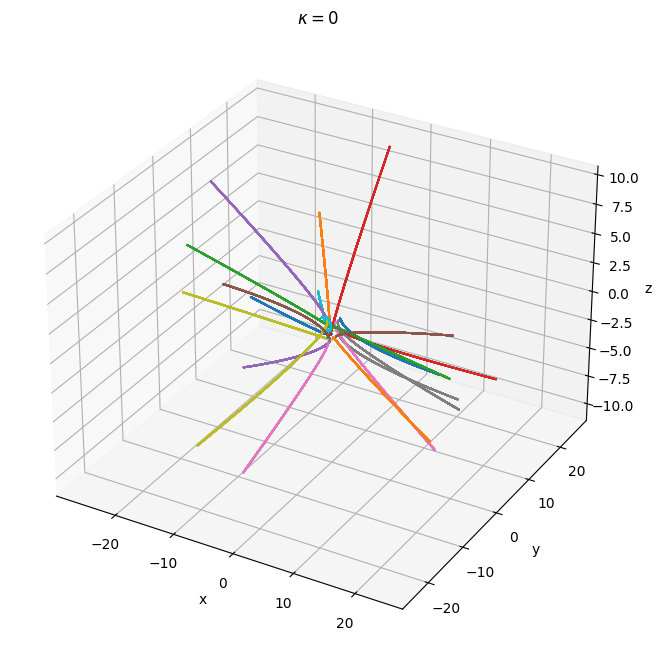

In [8]:
fig = plt.figure() #declaring a graph
fig.set_size_inches(16, 8) #figure size
ax1 = fig.add_subplot(111, projection='3d') #adding subplots
for i in range (20): #getting 20 random initital conditions and plotting them
    init_cond = [random.uniform(-1,1) for i in range(6)] #initial conditions 
    x_vals, y_vals, z_vals = trajectory(init_cond, 0.001, 10000,0) #getting the trajectory
    ax1.scatter(x_vals,y_vals,z_vals,s = 0.1) #plot

ax1.set_xlabel('x') #x axis
ax1.set_ylabel('y') #y axis
ax1.set_zlabel('z') #z axis
ax1.set_title("$\\kappa = 0$")# title
plt.show()

$\kappa = 0$ means there is no magnetic field which means that there is only electric field in the region. Therefore we know that the particles will repel from the positive charge as they move towards the line of charge. This is exactly what we see in the graph. We see all the particles being repelled from (0,0,0)

### * Particle Trajectories: $\kappa = 1$

<font color = blue>
Repeat the above exercise, this time with $\kappa = 1$.

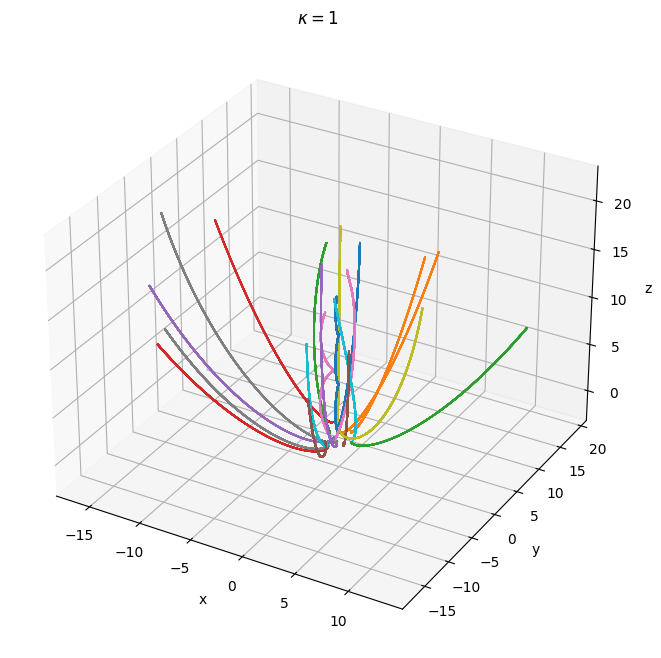

In [9]:
fig = plt.figure() #declaring a graph
fig.set_size_inches(16, 8) #figure size
ax1 = fig.add_subplot(111, projection='3d') #adding subplots
for i in range (20): #getting 20 random initital conditions and plotting them
    init_cond = [random.uniform(-1,1) for i in range(6)] #initial conditions 
    x_vals, y_vals, z_vals = trajectory(init_cond, 0.001, 10000,1) #getting the trajectory
    ax1.scatter(x_vals,y_vals,z_vals,s = 0.1) #plot

ax1.set_xlabel('x') #x axis
ax1.set_ylabel('y') #y axis
ax1.set_zlabel('z') #z axis
ax1.set_title("$\\kappa = 1$")# title
plt.show()

$\kappa = 1$ means that now we must take into account the magnetic and the electric field as we try to understand the trajectory that these random particles will take. In the above graph we see that the particles enter circular motion as they start repelling upwards from the line of charge which is exactly what we would expect to happen as charged particles would behave under the influence of a magnetic field. These particles first travel parallel to the electric field which is perpendicular to the magnetic field which is perpendicular to the direction of the current (using the left hand rule). This results in a constant upward motion. This is perfectly in accordance with the equation $F = qE +qv \times  B$

### * Particle Trajectories: $\kappa = 20$

<font color = blue>
Finally, repeat the process with $\kappa = 20$.  (Note that without redoing the problem from the beginning and choosing a different non-dimensionalization, we cannot actually turn off the electric force.  Instead, we are turning up the magnetic force to the point where it should dominate the behavior.)

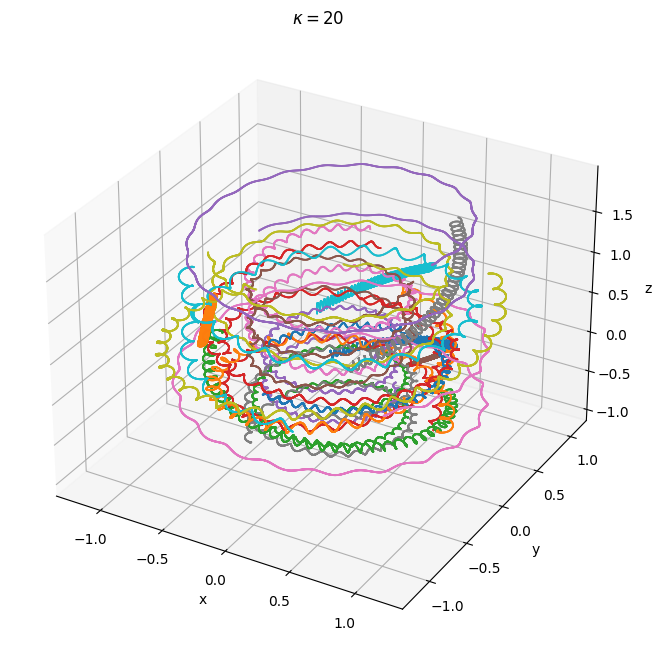

In [10]:
fig = plt.figure() #declaring a graph
fig.set_size_inches(16, 8) #figure size
ax1 = fig.add_subplot(111, projection='3d') #adding subplots
for i in range (20): #getting 20 random initital conditions and plotting them
    init_cond = [random.uniform(-1,1) for i in range(6)] #initial conditions 
    x_vals, y_vals, z_vals = trajectory(init_cond, 0.001, 10000,20) #getting the trajectory
    ax1.scatter(x_vals,y_vals,z_vals,s = 0.1) #plot

ax1.set_xlabel('x') #x axis
ax1.set_ylabel('y') #y axis
ax1.set_zlabel('z') #z axis
ax1.set_title("$\\kappa = 20$")# title
plt.show()

$\kappa = 20$ means that now there is a very strong magnetic field (larger than the electric field) in the given region. Here we see three different types of motion that are involved. There is a repelling upward motion, a circular motion around the magnetic field lines which together result in a upward spiraling away from the line of charge. This is exactly what we see in the plot above.

## A Generic Finite Difference Function

<font color = blue>
We are interested in solving the general equation type

$$
A(x)u'' + B(x)u' + C(x)u = \lambda u
$$

subject to the boundary conditions

$$
u(0) = u(x_{\infty}) = 0
$$

(by which we mean that we want to find both the eigenvalue $\lambda$ and the eigenfunction $u(x)$.)  The basic approach used today will be to transform this equation into a matrix equation in the form

$$
\mathbb{M}\vec{u} = \lambda\vec{u}
$$

and the focus will be on generating the matrix $\mathbb{M}$, which we can then use existing python libraries to analyze.

### A Matrix Generating Function

<font color = blue>
Construct a function that takes as inputs the three functions $A(x)$, $B(x)$, and $C(x)$, along with $N$, the total size-length of the matrix and $x_{\infty}$ the value of "numerical infinity", and outputs the matrix $\mathbb{M}$ (as an array.)  Test your matrix generator with $A = B = C = 1$, $x_{\infty} = 1$, and $N = 5$, and show the result.  Confirm that the entries to the matrix are correct.

In [11]:
code goes here

SyntaxError: invalid syntax (3819258900.py, line 1)

discussion goes here

### A Second Matrix Generating Function

<font color = blue>
There are many numerical methods that find the eigenvalues and eigenvectors of a matrix, but they are definitely not all created equal.  Even though we aren't learning the algorithms behind these methods, it is still useful to consider some of their differences.

There are a set of algorithms specifically designed to work on matrices which are "sparse", meaning that most of the elements in them are zero.  However, in order to use these algorithms, we have to create and store the matrix in a way other than the standard numpy array.  What we want to do here is write a second function for creating a matrix, but this time store it as a "sparse" matrix type.  

To do this you will need to use the library scipy.sparse.  There is more than one sparse matrix type (the differences are in how the data is stored in your computer), but the easiest one to create is the "coo" type, so you will need to use the function coo_matrix in the scipy.sparse library.  

Once you have your function for creating the matrix, you can take its output and convert it into a standard array using .toarray().  (This is helpful for making sure this code produces the same matrix you've just confirmed is correct in the previous code.)

In [ ]:
code goes here

discussion goes here

### Comparing Linear Algebra Packages

<font color = blue>
Here, we will compare the efficiency of a method which uses sparse techniques with one that doesn't.  We will use the infinite square well system as an example, where

$$
A(x) = -1, \hspace{.75in} B(x) = C(x) = 0
$$

and

$$
x_{\infty} = 1
$$

For your standard numpy array matrix, use the function numpy.linalg.eigh.  For your sparse coo-type matrix use the function scipy.sparse.linalg.eigsh.  (Note that both of these functions assume the matrix you are providing is Hermetian, which when finding the energy eigenstates in quantum mechanics you always have.)

One thing to be aware of is that the "sparse" function is designed to generate only a subset of the total eigenvalues and eigenvectors (specified by the parameter $k$, which here we will set to 1.)  Furthermore, they are naturally ordered from largest magnitudes of eigenvalues to smallest.  We are more interested in the smallest magnitude eigenvalues, which we can get out by setting the parameter "sigma = 0".  


Using each of these two functions, determine the time required to compute the first eigenvalue/eigenvector for N in the range $[10, 1000]$, in steps of $10$.  Plot these two sets of times together on the same graph, and discuss which method is more efficient.


In [ ]:
code goes here

discussion goes here

## Hydrogen

<font color = blue>
Now we want to analyze the Hydrogen atom, where we are trying to solve the equation (in dimensionless form, as usual)

$$
-u'' + \frac{\ell(\ell+1)}{r^2}u - \frac{2}{r}u + u = \hat{E}u
$$

Remember that here, length is measured in units of the Bohr radius, and energy is measured in units of the Rydberg energy, but with an upward shift of $+1$ so that

$$
\tilde{E} = \hat{E} - 1
$$

The value $\ell$ is the quantum number associated with the magnitude of angular momentum.  With this non-dimensionalization, the energy spectrum should be

$$
\tilde{E}_n = -\frac{1}{n^2}, \hspace{.5in} \mbox{or} \hspace{.5in} \hat{E}_n = 1 - \frac{1}{n^2}.
$$

### Preliminaries

<font color = blue>
First create a function that takes as input the value of $\ell$ as well as the choice of "numerical infinity" and the value of $N$, and outputs the appropriate matrix.

In [ ]:
code goes here

discussion goes here

### Eigenvalues

#### * Zero Angular Momentum States

<font color = blue>
Now, use your function to genererate the energy spectrum of the lowest ten energies of hydrogen, with $\ell = 0$. Create arrays with entries $[n]$ and $[\tilde{E}_n]$, and plot this together with a curve showing the theoretical spectrum.  (Don't forget to shift the energies back from $\hat{E}$ to $\tilde{E}$!)  For this exercise, use $x_{\infty} = 1000$ and $N = 100000$.

In [ ]:
code goes here

discussion goes here

#### * Non-Zero Angular Momentum States

<font color = blue>
Then, use your function to also generate lists of energies for $\ell = 1$ and $\ell = 2$.  (Use the same $x_{\infty}$ and $N$ values.)

One of the most interesting physical phenomena in this system is "degeneracy": there are multiple different values of $\ell$ which lead to the same energy for a generate energy level in this system.  In order to demonstrate this, create a graph showing all three values of $\ell$.  Put energy on the vertical axis, and $\ell$-value on the horizontal axis.  In order to emphasize the degeneracy of the spectrum, add horizontal lines at each energy level.

In [ ]:
code goes here

discussion goes here

### Eigenvectors

#### Anaytlic Comparisons

<font color = blue>
Now let's make some comparisons between the eigenvectors generated numerically and the known analytic functions for the radial wavefunction $R(r)$.  Use the "eigsh" function to generate the eigenvectors associated with the sets of quantum numbers $(n = 1, \ell = 0)$, $(n - 2, \ell = 0)$, and $(n = 2, \ell = 1)$.  For this, use $x_{\infty} = 1000$ and $N = 100000$.  Convert these lists into discrete approximations of the radial wavefunction

$$
R(r) = \frac{u(r)}{r}
$$

In addition, create a list of $r$-coordinates $[r_n]$.  Then plot each, together with its analytic, known solution:

$$
n = 1, \ell = 0: \hspace{.5in} R(r) \propto e^{-r}
$$

$$
n = 2, \ell = 0: \hspace{.5in} R(r) \propto \left(1 - \frac{r}{2}\right)e^{-r/2}
$$

$$
n = 2, \ell = 1: \hspace{.5in} R(r) \propto r e^{-r/2}
$$

(you will have to manually "tune" a constant of proportionality in each case until it fits well.)

In [ ]:
code goes here

discussion goes here

#### The Role of $\Delta x$

<font color = blue>
We would now like to examine the roll that $\Delta x$ plays in limiting the accuracy and applicability of our numerical method.  To do so, consider the radial wavefunction $R(r)$ with $n = 4$ and $\ell = 1$.  Create plots of this wavefunction for different values of $N$:

$$N = 100000$$

$$N = 10000$$

$$N = 1000$$

$$N = 100$$

all with $x_{\infty} = 1000.$  (Note that the normalization of the eigenvector will change as you change $N$.)

This corresponds to four different choices of $\Delta x$.  For what values do you think the wavefunction is well represented?  What, in general, must be true of $\Delta x$ in order for the finite different method to work well (on a particular wavefunction)?



In [ ]:
code goes here

discussion goes here

#### The Role of $x_{\infty}$

<font color = blue>
Now let's consider the first 10 eigenstates with $\ell = 0$, but use $x_{\infty} = 100$ and $N = 10000$ (notice that we have kept the spacing $\Delta x$ roughly the same as in our original work.  First, find the lowest ten energy eigenvalues.  What is strange (and not correct) about the last couple?  Generate the actual eigenvector corresponding to the 10th eigenvalue, and then generate it again with $x_{\infty} = 1000$ and $N = 100000$, and plot the two (in this case, it's more useful to plot $u(r)$ than to plot $R(r)$.)  What must be true of the choice of numerical infinity, in order for the eigenfunction and eigenvalue to be effectively estimated?

In [ ]:
code goes here

discussion goes here

## Any Other Problem

<font color = blue>
Find a physical problem different from the ones discussed above that involves either an initial-value-specified ODE or an eigenvalue boundary-value=specified ODE, and apply one of the week's numerical methods to solve it.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.